In [1]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df = df.loc[:,tuple(filter(lambda x: x.startswith("texture"), df.columns))]
df

,texture-1,texture-2,texture-3,texture-4,texture-5,texture-6,texture-7,texture-8,texture-9,texture-10,...,texture-41,texture-42,texture-43,texture-44,texture-45,texture-46,texture-47,texture-48,texture-49,texture-50
0,78.366213,1.375059,-47.160250,-61.342786,0.191145,28.157157,35.680815,-22.678528,0.543546,5.440461,...,-3.124014,15.822146,-5.238237,-8.866636,16.433249,5.281840,4.809605,23.777752,2.701257,-8.756467
1,231.648221,31.941781,38.045363,1.151072,-36.965688,61.582956,33.014443,39.935729,30.649975,-16.117651,...,18.990617,-22.977065,-9.595909,15.675062,-11.052332,-15.954203,-4.544064,6.404377,-22.392381,4.262543
2,81.589958,48.561836,-15.467717,-13.029406,-6.484811,-10.902924,11.898539,-3.475740,23.735585,4.466649,...,4.875360,12.795344,-8.682813,-14.420254,-1.259610,-9.002626,5.368778,1.003062,-0.103703,4.233249
3,105.823315,-35.737197,-1.395547,-23.909253,-21.181074,35.144124,14.208679,3.213558,-6.587694,0.829230,...,10.268180,-25.507403,7.171589,7.751412,-16.464856,1.484186,6.026713,13.910591,-12.614505,-21.948731
4,309.552895,-12.972866,-1.298041,-29.754324,19.957813,70.453026,-49.448016,43.095413,70.403421,-36.368937,...,-4.552249,11.945905,-5.770487,-19.719509,0.255081,-19.332189,2.168323,11.915150,27.664921,-7.366030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,99.535047,-22.844959,-61.126338,56.491282,-2.214647,-24.956193,9.551967,6.228909,-24.458221,5.624971,...,-6.082225,5.279923,13.481888,-1.939370,10.223505,4.270683,11.816370,-3.260196,6.355982,-9.165379
408,117.070272,-48.887011,-22.740016,29.212970,-11.382040,-44.576483,0.446502,-20.805849,-3.381760,-4.181321,...,-6.089939,1.543002,16.886465,-20.758603,-0.288074,8.360364,15.242383,3.825476,-15.755290,-3.805483
409,148.834363,-42.631841,-37.555332,26.139753,-5.608563,-26.460363,10.348243,-12.662605,-11.320279,7.474618,...,7.497172,11.360169,11.923206,-1.238594,-11.231843,-6.050167,2.660850,11.134278,7.677054,10.696933
410,237.662361,-27.866393,-72.573931,38.879356,8.975383,-3.505125,-67.905552,58.790169,-17.606369,17.995908,...,-12.752099,1.768987,3.435243,-2.244720,4.115752,-9.313684,-6.855695,15.914760,-1.309466,1.208955


In [81]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset = train_dataset.shuffle(100).batch(16)
test_dataset = test_dataset.batch(16)
validation_dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(50,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [82]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(100, activation="sigmoid"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(500, activation="sigmoid"),
  keras.layers.Dense(6),
  keras.layers.Softmax(),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.005), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

In [83]:
history = model.fit(
  train_dataset, epochs=20,
  validation_data=validation_dataset,
  # callbacks=keras.callbacks.EarlyStopping(
  #   monitor='val_loss',
  #   min_delta=0,
  #   patience=3,
  #   verbose=0,
  #   mode='auto'
  # )
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1854 - loss: 2.1284 - val_accuracy: 0.2907 - val_loss: 1.9915
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3190 - loss: 1.6925 - val_accuracy: 0.2209 - val_loss: 1.7618
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3869 - loss: 1.4114 - val_accuracy: 0.5349 - val_loss: 1.3907
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6043 - loss: 1.0709 - val_accuracy: 0.5349 - val_loss: 1.2707
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.8777 - val_accuracy: 0.4767 - val_loss: 1.4365
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.7707 - val_accuracy: 0.5000 - val_loss: 1.4623
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.6936 - val_accuracy: 0.5814 - val_loss: 1.2014
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8226 - loss: 0.6003 - val_accuracy: 0.5814 - val_loss

In [84]:
model.evaluate(test_dataset)

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5625 - loss: 1.6468

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 1.5446 


[1.690489649772644, 0.5403226017951965]

In [79]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_11060\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


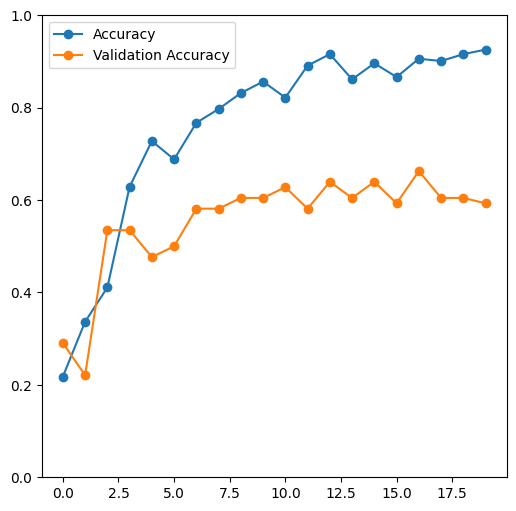

In [85]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()